# Hospital Waiting Lists in Northern Ireland
## Cleaning datasets

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [257]:
conda install -c conda-forge folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Pat\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.10.1              |             py_0          59 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following packages will be UPDATED:

  folium                                         0.5.0-py_0 --> 0.10.1-py_0




folium-0.10.1        | 59 KB     |            |   0% 
folium-0.10.1        | 59 KB     | ##7        |  27% 
folium-0.10.1        | 59 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;import plotly.express as px;import folium
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
#import geopandas as gpd

## Input the GeoJSON & Co-ordinate Data

In [3]:
TBDirectory="https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";print("All GeoJSON Imported")

All GeoJSON Imported


In [4]:
Coords = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/coordinates.csv");TrustMPs=Coords.groupby('Trust').mean();print("All Coordinates Imported")

All Coordinates Imported


## Clean the Emergency and Diagnostics Dataset

In [191]:
EmergWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-ecwt-tables-q1-18-19.csv");

EmergWL = EmergWL.replace("Royal Victoria (ENT & RAES)","Royal Victoria",inplace=False);
EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)","Royal Victoria", inplace=False);
EmergWL = EmergWL.replace("Royal Victoria (ENT & RAES)","Royal Victoria",inplace=False);
EmergWL = EmergWL.replace("Royal Victoria (RAES)","Royal Victoria", inplace=False);

EmergWL=EmergWL.fillna(0);EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(" ","");EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(",","").astype(float);EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(" ","");EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(",","").astype(float);EmergWL["FiveToTwelve_sum"] = EmergWL["FiveToTwelve_sum"].str.replace(",","").astype(float) 
DiagnosticWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-waiting-times-q2-19-20.csv");DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);
DiagnosticRTT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-reporting-turnaround-q2-19-20.csv");DiagnosticRTT=DiagnosticRTT.drop_duplicates();DiagnosticRTT.replace(".", 0, inplace=True);DiagnosticRTT=DiagnosticRTT.fillna(0);DiagnosticRTT=DiagnosticRTT.drop([9947]);DiagnosticRTT.drop(DiagnosticRTT.columns[DiagnosticRTT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticRTT["0-2 days"] = DiagnosticRTT["0-2 days"].str.replace(",","").astype(int);DiagnosticRTT["3-7 days"] = DiagnosticRTT["3-7 days"].str.replace(",","").astype(int);DiagnosticRTT["8-14 days"] = DiagnosticRTT["8-14 days"].str.replace(",","").astype(int);DiagnosticRTT["15-21 days"] = DiagnosticRTT["15-21 days"].str.replace(",","").astype(int);DiagnosticRTT["22-28 days"] = DiagnosticRTT["22-28 days"].str.replace(",","").astype(int);DiagnosticRTT[">28 days	"] = DiagnosticRTT[">28 days"].str.replace(",","").astype(int);DiagnosticRTT["Total"] = DiagnosticRTT["Total"].str.replace(",","").astype(int)
#DiagnosticRTT.drop(DiagnosticRTT.rows[DiagnosticRTT.rows.str.contains('the ending',case = False)],axis = 1, inplace = True)
print("All Emergency and Diagnostics Data Imported")

All Emergency and Diagnostics Data Imported


In [192]:
matplotlib inline

In [194]:

df=EmergWL
EmergWL['New_Hospital'].value_counts()
df['% Above Four Weeks']= 100-100*df['FourAndUnder_sum'].divide(df["Total_sum"], fill_value=1) 
F=df.groupby('New_Hospital')['% Above Four Weeks'].mean()
F


#df.groupby['% Above Four Weeks'].means()
#['% Above Four Weeks '].means()

#df=df.drop(df.columns[[5,6,7,8,9,10,11,12]], axis = 1, inplace = False) 
#df2=df.dropna(axis='columns')

New_Hospital
Altnagelvin Area    25.626294
Antrim Area         31.789015
Ards MIU             0.000908
Armagh Community     0.007762
Bangor MIU           0.002483
Belfast City        25.534480
Causeway            23.225625
Craigavon Area      23.109052
Daisy Hill          12.935012
Downe                9.392547
Lagan Valley        11.288492
Mater               27.015919
Mid-Ulster           0.632407
RBHSC               14.354372
Royal Victoria      21.680372
South Tyrone         0.012727
South West Acute    12.698132
Tyrone County        0.206954
Ulster              26.050126
Whiteabbey           0.431842
Name: % Above Four Weeks, dtype: float64

In [277]:
EmergWL.head()



,Year,MthAndYrCode,Trust,New_Hospital,Type,FourAndUnder_sum,FiveToTwelve_sum,OverTwelve_sum,Total_sum,% Above Four Weeks
0,2008/09,Apr-08,Belfast,Belfast City,Type 1,3391.0,473.0,1,3865.0,12.263907
1,2008/09,Apr-08,Belfast,Mater,Type 1,3142.0,486.0,0,3628.0,13.395810
2,2008/09,Apr-08,Belfast,Royal Victoria,Type 1,5224.0,862.0,0,6086.0,14.163654
3,2008/09,Apr-08,Belfast,RBHSC,Type 1,2480.0,398.0,0,2878.0,13.829048
4,2008/09,Apr-08,Northern,Antrim Area,Type 1,4728.0,667.0,10,5405.0,12.525439


In [242]:
#ogr2ogr -t_srs EPSG:4326 -f GeoJSON file.json file.shp

SyntaxError: invalid syntax (<ipython-input-242-4aa43df54156>, line 1)

In [231]:
Results = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/Hospitals.csv")
Results.head()



,Hospital,Latitude,Longitude,PC Above Four Weeks
0,Altnagelvin Area,54.985860,-7.292662,25.6263
1,Antrim Area,54.733760,-6.186880,31.7890
2,Ards MIU,54.594860,-5.705910,0.0009
3,Armagh Community,54.350679,-6.642694,0.0078
4,Bangor MIU,54.350679,-5.662600,0.0025


In [365]:
df=EmergWL
G=df.groupby('Trust')['% Above Four Weeks'].mean()
G

Trust
Belfast          21.523938
Northern         15.255429
South Eastern     9.346911
Southern          9.878856
Western          12.843793
Name: % Above Four Weeks, dtype: float64

In [363]:
import folium
import pandas as pd
data=Results
markers_geojson=r"https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";
df=EmergWL
G=df.groupby('Trust')['% Above Four Weeks'].mean()
TrustMap = folium.Map(location=[54.6, -7.7], tiles="Stamen Terrain", zoom_start=8.45)
m=TrustMap

TrustMap.choropleth(geo_data=markers_geojson, data=G,
             columns=['Trust', '% Above Four Weeks'],
            threshold_scale = [9,12,15,18,21],
             key_on='feature.properties.Trust',
                    #key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.9, line_opacity=0.2, 
             legend_name='% Above Four Weeks', reset=True)



data.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], 
                                                  row["Longitude"]]).add_to(TrustMap),
         axis=1)

folium.GeoJson(markers_geojson).add_to(m)

# convert to (n, 2) nd-array format for heatmap
#Hospitals = Results[['Latitude', 'Longitude']].as_matrix()

# plot heatmap
#m.add_children(plugins.HeatMap(Hospitals, radius=15))
#m

TrustMap

#df=EmergWL
#EmergWL['New_Hospital'].value_counts()
#df['% Above Four Weeks']= 100-100*df['FourAndUnder_sum'].divide(df["Total_sum"], fill_value=1) 
#F=df.groupby('New_Hospital')['% Above Four Weeks'].mean()
#F
#Results = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/Hospitals.csv")


#bin_intervals = list(EmergWL['% Above Four Weeks'].quantile([0, 0.25, 0.5, 0.75, 1]))

KeyError: "None of ['Trust'] are in the columns"

In [355]:

import folium
import pandas as pd
#data=Results
markers_geojson=r"https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";
#TrustMap = folium.Map(location=[54.6, -7.7], tiles="Stamen Terrain", zoom_start=8.45)
#m=TrustMap
#data.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], 
#                                                  row["Longitude"]]).add_to(TrustMap),
#         axis=1)
#folium.GeoJson(markers_geojson).add_to(m)

#TrustMap


#import pandas as pd


#url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
#state_geo = f'{url}/us-states.json'
#state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'



m = folium.Map(location=[54.6, -7.7], zoom_start=8.45)

bins = list(EmergWL['% Above Four Weeks'].quantile([0, 0.25, 0.5, 0.75, 1]))


TrustMap.choropleth(geo_data=markers_geojson, data=EmergWL,
             columns=['Trust', '% Above Four Weeks'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2, 
             legend_name='% Above Four Weeks', reset=True)
#'YlGn'


folium.LayerControl().add_to(m)


In [9]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.45031712, 0.45031712, 0.46723044, 0.49894292, 0.50105708,
       0.50951374, 0.52854123, 0.51374207, 0.53065539, 0.50951374,
       0.50105708, 0.49048626, 0.50105708, 0.51162791])

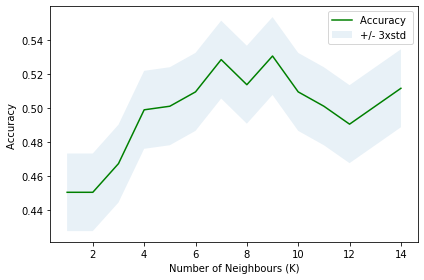

The best accuracy was with 0.5306553911205074 with k= 9


In [10]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Train set: (1892, 4) (1892,)
Test set: (473, 4) (473,)
Train set Accuracy:  0.5972515856236786
Test set Accuracy:  0.5983086680761099


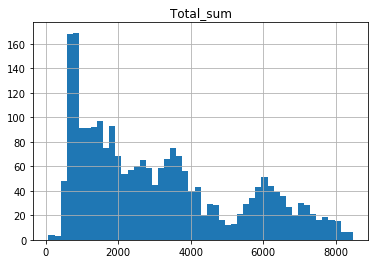

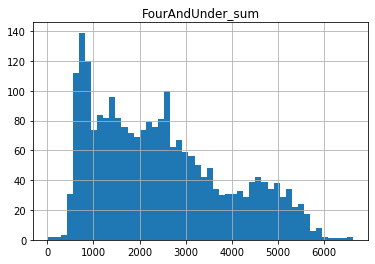

In [11]:

EmergWL['New_Hospital'].value_counts()

EmergWL.hist(column='Total_sum', bins=50)
EmergWL.hist(column='FourAndUnder_sum', bins=50)
EmergWL.columns

X = EmergWL[['FourAndUnder_sum', 'FiveToTwelve_sum', 'OverTwelve_sum', 'Total_sum']] .values #.astype(float)
X[0:5]

y = EmergWL['Trust'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 40
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



In [12]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56659619, 0.54545455, 0.57716702, 0.59830867, 0.59830867,
       0.59408034, 0.61733615, 0.59196617, 0.60887949, 0.59830867,
       0.59830867, 0.60465116, 0.60887949, 0.60887949])

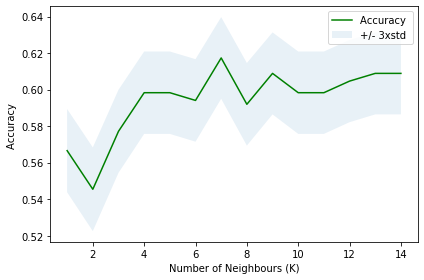

The best accuracy was with 0.6173361522198731 with k= 7


In [13]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Train set: (1892, 4) (1892,)
Test set: (473, 4) (473,)
Train set Accuracy:  0.5972515856236786
Test set Accuracy:  0.5983086680761099


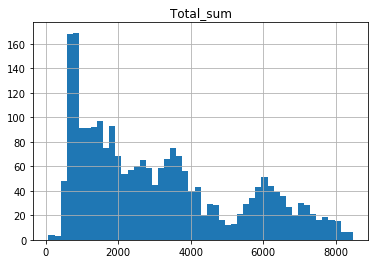

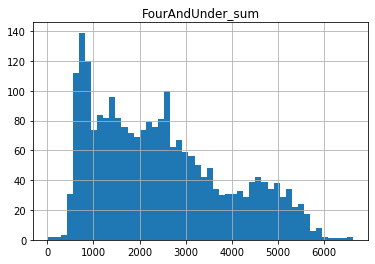

In [14]:

EmergWL['Trust'].value_counts()

EmergWL.hist(column='Total_sum', bins=50)
EmergWL.hist(column='FourAndUnder_sum', bins=50)
EmergWL.columns

X = EmergWL[['FourAndUnder_sum', 'FiveToTwelve_sum', 'OverTwelve_sum', 'Total_sum']] .values #.astype(float)
X[0:5]

y = EmergWL['Trust'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 40
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



In [15]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56659619, 0.54545455, 0.57716702, 0.59830867, 0.59830867,
       0.59408034, 0.61733615, 0.59196617, 0.60887949, 0.59830867,
       0.59830867, 0.60465116, 0.60887949, 0.60887949])

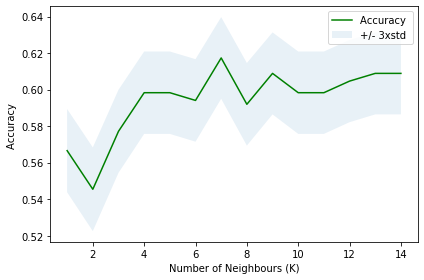

The best accuracy was with 0.6173361522198731 with k= 7


In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [156]:

#P=DiagnosticWT.groupby('Month')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
#P.plot.line()
#Q=DiagnosticWT.groupby('Category of test')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
#Q.plot.barh()
DiagnosticWT.head()

,Quarter Ending,HSC Trust,Diagnostic Service,Recommended Waiting Time,Category,0 - 6 weeks,> 6 - 9 weeks,> 9 - 13 weeks,> 13 - 21 weeks,> 21 - 26 weeks,...,> 36 weeks,> 36 - 52 weeks,> 52 - 65 weeks,> 65 - 78 weeks,> 78 weeks,Total,Below 9 weeks,% Below 9 weeks,Below 13 weeks,% Below 13 weeks
0,31-Mar-08,Belfast,Barium Studies,9 week,Imaging,256.0,0.0,60.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,316.0,256.0,81.012658,316.0,100.000000
1,31-Mar-08,Belfast,Colonoscopy,13 week,Endoscopy,269.0,0.0,270.0,128.0,0.0,...,0.0,NaN,NaN,NaN,NaN,667.0,269.0,40.329835,539.0,80.809595
2,31-Mar-08,Belfast,Computerised Tomography,9 week,Imaging,907.0,0.0,346.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,1253.0,907.0,72.386273,1253.0,100.000000
3,31-Mar-08,Belfast,Cystoscopy,13 week,Endoscopy,371.0,0.0,258.0,160.0,0.0,...,0.0,NaN,NaN,NaN,NaN,789.0,371.0,47.021546,629.0,79.721166
4,31-Mar-08,Belfast,DEXA Scan,9 week,Imaging,281.0,0.0,325.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,606.0,281.0,46.369637,606.0,100.000000


In [18]:
DiagnosticWT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8579 entries, 0 to 8578
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Quarter Ending            8579 non-null   object 
 1   HSC Trust                 8579 non-null   object 
 2   Diagnostic Service        8579 non-null   object 
 3   Recommended Waiting Time  8579 non-null   object 
 4   Category                  8579 non-null   object 
 5   0 - 6 weeks               8579 non-null   float64
 6   > 6 - 9 weeks             8579 non-null   float64
 7   > 9 - 13 weeks            8579 non-null   float64
 8   > 13 - 21 weeks           8579 non-null   float64
 9   > 21 - 26 weeks           8579 non-null   float64
 10  > 26 weeks                8579 non-null   float64
 11  > 26 - 36 weeks           1070 non-null   float64
 12  > 36 weeks                8579 non-null   float64
 13  > 36 - 52 weeks           1070 non-null   float64
 14  > 52 - 6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023241D03CC8>]],
      dtype=object)

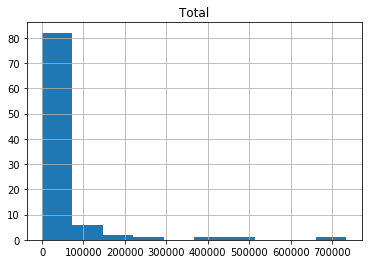

In [19]:
A=DiagnosticWT.groupby('Diagnostic Service').sum()
B=DiagnosticWT.groupby('Category').sum()
C=DiagnosticWT.groupby('Recommended Waiting Time').sum()
C
#x=A["0-6 weeks"]
#y=A["Total"]
A.hist(column='Total', bins=10)
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.show()
#.hist(column='0 - 6 weeks', bins=150)
#EmergWL.hist(column='FourAndUnder_sum', bins=50)
#A.plot.bar()

In [131]:
#DiagnosticWT.column()

In [21]:
DiagnosticWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-waiting-times-q2-19-20.csv");DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);

df=DiagnosticWT
df['Below 9 weeks'] = df["> 6 - 9 weeks"] + df["0 - 6 weeks"]
df['% Below 9 weeks'] = 100*df['Below 9 weeks'].divide(df["Total"], fill_value=1)
df['Below 13 weeks'] = df["> 9 - 13 weeks"] + df['Below 9 weeks']
df['% Below 13 weeks']= 100*df['Below 13 weeks'].divide(df["Total"], fill_value=1) 
df=df.drop(df.columns[[5,6,7,8,9,10,11,12]], axis = 1, inplace = False) 
df2=df.dropna(axis='columns')
df2['Below Recommended'] = np.where(df2["Recommended Waiting Time"] == "9 week", df['% Below 9 weeks'],df['% Below 13 weeks'])
df2



# Visualize pairplot of df

#df2.head()
#df.info()
#df.list()
#plt.figure(figsize=(8,5))
#x_data, y_data = (df2['% Below 9 weeks'].values, HSCT31DCWT['% Below 13 weeks'].values)
#plt.plot(x_data, y_data,'ro')
#plt.ylabel('62 days')
#plt.xlabel('31 days')
#plt.show()

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quarter Ending,HSC Trust,Diagnostic Service,Recommended Waiting Time,Category,Total,Below 9 weeks,% Below 9 weeks,Below 13 weeks,% Below 13 weeks,Below Recommended
0,31-Mar-08,Belfast,Barium Studies,9 week,Imaging,316.0,256.0,81.012658,316.0,100.000000,81.012658
1,31-Mar-08,Belfast,Colonoscopy,13 week,Endoscopy,667.0,269.0,40.329835,539.0,80.809595,80.809595
2,31-Mar-08,Belfast,Computerised Tomography,9 week,Imaging,1253.0,907.0,72.386273,1253.0,100.000000,72.386273
3,31-Mar-08,Belfast,Cystoscopy,13 week,Endoscopy,789.0,371.0,47.021546,629.0,79.721166,79.721166
4,31-Mar-08,Belfast,DEXA Scan,9 week,Imaging,606.0,281.0,46.369637,606.0,100.000000,46.369637
...,...,...,...,...,...,...,...,...,...,...,...
8574,30-Sep-19,Western,Spirometry inc.flow volume curves,9 week,Physiological Measurement,94.0,86.0,91.489362,94.0,100.000000,91.489362
8575,30-Sep-19,Western,Static lung volumes,9 week,Physiological Measurement,79.0,71.0,89.873418,79.0,100.000000,89.873418
8576,30-Sep-19,Western,Tilt testing and autonomic function,9 week,Physiological Measurement,18.0,10.0,55.555556,14.0,77.777778,55.555556
8577,30-Sep-19,Western,Transfer Factor,9 week,Physiological Measurement,92.0,84.0,91.304348,92.0,100.000000,91.304348


In [22]:
df3=df2
df3['Quarter Ending']=pd.to_datetime(df3['Quarter Ending'])
#df3.to_datetime('13000101', format='%d%m%Y', errors='ignore')
#pd.to_datetime('2010/11/12', format='%Y/%m/%d')

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: 'AxesSubplot' object is not callable

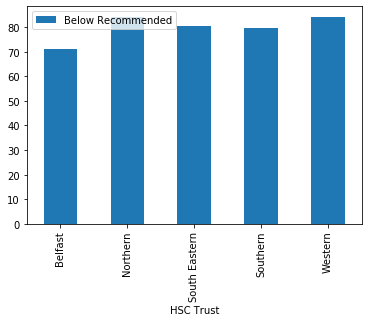

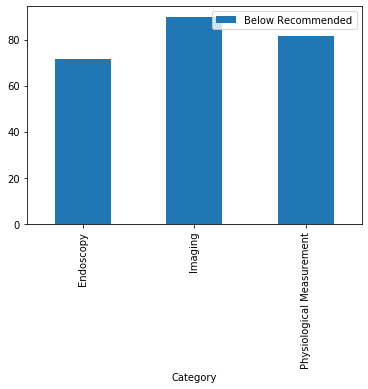

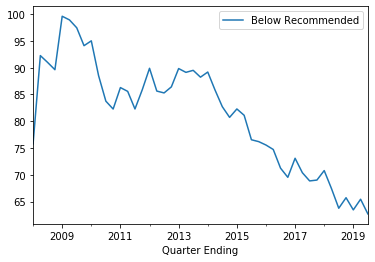

In [23]:
df2
V=df2.groupby("HSC Trust").mean()
V.plot.bar(y='Below Recommended')

#df2
W=df2.groupby("Category").mean()
W.plot.bar(y='Below Recommended')


W=df3.groupby("Quarter Ending").mean()
W.plot.line(y='Below Recommended')(subplots=True)
#P=df2.groupby(['Recommended Waiting Time','Diagnostic Service']).size().reset_index().groupby('Diagnostic Service')[[0]].max()
#P
#sns.pairplot(P, hue='rating')

In [24]:
#df.drop(df.columns[[6,7,8]], axis = 1, inplace = True) 

In [25]:

DiagnosticRTT['Month']=pd.to_datetime(DiagnosticRTT['Month'])
DiagnosticRTT.head()

,Month,HSC Trust,Category of test,Test,Priority,0-2 days,3-7 days,8-14 days,15-21 days,22-28 days,>28 days,Total,% reported within 2 days,% reported within 2 weeks,% reported within 4 weeks,>28 days\t
0,2010-10-31,Belfast,IMAGING,BARIUM ENEMA,ROUTINE,88,9,4,1,15,5,122,0.0,82.8,95.9,5
1,2010-10-31,Belfast,IMAGING,BARIUM ENEMA,URGENT,9,3,0,0,0,0,12,75.0,0.0,0.0,0
2,2010-10-31,Belfast,IMAGING,COMPUTERISED TOMOGRAPHY,ROUTINE,1521,218,83,7,127,31,1987,0.0,91.7,98.4,31
3,2010-10-31,Belfast,IMAGING,COMPUTERISED TOMOGRAPHY,URGENT,279,43,18,2,10,4,356,78.4,0.0,0.0,4
4,2010-10-31,Belfast,IMAGING,DEXA SCAN,ROUTINE,0,0,1,2,1,6,10,0.0,10.0,40.0,6


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



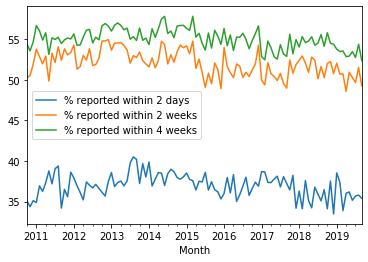

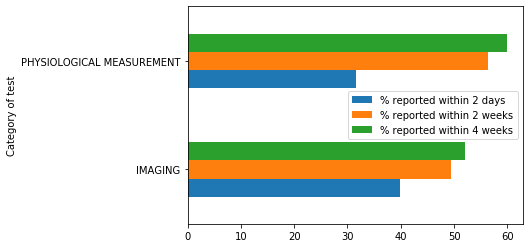

In [26]:
#df3['Quarter Ending']=pd.to_datetime(df3['Quarter Ending'])
P=DiagnosticRTT.groupby('Month')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
P.plot.line()
Q=DiagnosticRTT.groupby('Category of test')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
Q.plot.barh()

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



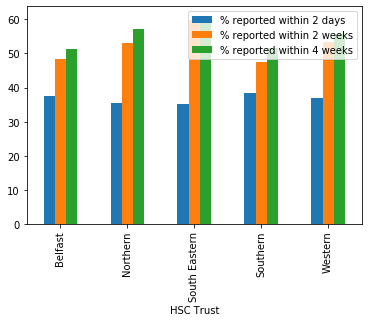

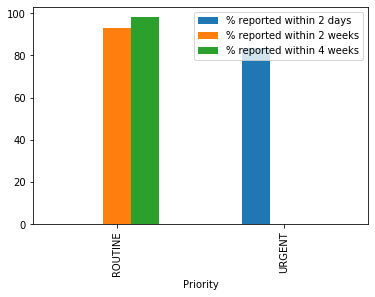

In [27]:
#DiagnosticRTT.head()

#R=DiagnosticRTT.groupby('Test')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
#R.plot.barh()
#R.plot.kde()
S=DiagnosticRTT.groupby('HSC Trust')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
S.plot.bar()
T=DiagnosticRTT.groupby('Priority')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
T.plot.bar()



In [28]:

X=EmergWL.groupby('New_Hospital')



#.describe()
#EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)",
#                          "The Royal", 
#                          inplace=True)
#EmergWL.describe()

## Clean the Inpatient and Outpatient lists

In [109]:
FirstCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-q2-19-20.csv")
#Remove footer data
FirstCOPWL=FirstCOPWL.drop([6134,6135,6136,6137,6138])
FirstCOPWL.replace("--", 0, inplace=True)
#FirstCOPWL["0 - 6 weeks"] = pd.to_numeric(FirstCOPWL["0 - 6 weeks"])


CentralCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-centralisation-q2-19-20.csv")
#Remove footer data
CentralCOPWL=CentralCOPWL.drop([66,67,68,69,70,71]),CentralCOPWL=CentralCOPWL.dropna(axis='columns')
OrigCCOPWL=CentralCOPWL
CentralCOPWL.replace("--", 0, inplace=True)


#CentralCOPWL["Total Waiting "] = CentralCOPWL["Total Waiting "].str.replace(",","").astype(float)
#CentralCOPWL[" > 18 weeks "] = CentralCOPWL[" > 18 weeks "].astype(float)
#CentralCOPWL['Below 18 weeks']= CentralCOPWL.iloc[:, 4:9].sum(axis=1)
#CentralCOPWL['Below 18 weeksB']= CentralCOPWL.iloc[:, 4:9].sum(axis=1)

#CentralCOPWL.drop(CentralCOPWL.columns[[4,5,6,7,8,9,10,11]], axis = 1, inplace = True) 
#CentralCOPWL['Above 18 weeks']= CentralCOPWL.iloc[:,-2:-1].subtract(axis=1)
#CentralCOPWL.drop(columns =["Treatment Month"], inplace = True) 
#CentralCOPWL['Above 18 weeks'] = CentralCOPWL['Total Waiting '].sub(CentralCOPWL['Below 18 weeks'], axis = 0) 
CentralCOPWL

ICATSWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-icats-q2-19-20.csv")
ICATSWLA=ICATSWL.drop_duplicates();ICATSWL=ICATSWLA.drop([689,691,692,693,694]);ICATSWL=ICATSWL.dropna(axis='columns');ICATSWL=ICATSWL.fillna(0)
ICATSWL.replace("--", 0, inplace=True)
#Remove footer data

DayCaseIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-day-cases-q2-19-20.csv")
#Remove footer data
DayCaseIPWL=DayCaseIPWL.drop([4399,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412]);DayCaseIPWL.drop(DayCaseIPWL.columns[DayCaseIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DayCaseIPWL.replace("--", 0, inplace=True);DayCaseIPWL.fillna(0)
#TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


AdminIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-inpatients-q2-19-20.csv")
#Remove footer data
AdminIPWL=AdminIPWL.drop([2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005]);AdminIPWL=AdminIPWL.dropna(axis='columns');AdminIPWL=AdminIPWL.fillna(0);AdminIPWL.drop(AdminIPWL.columns[AdminIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

AdminIPWL["0 - 6 weeks"] = AdminIPWL["Total"].str.replace(",","").astype(int);AdminIPWL["> 6 - 13 weeks"] = AdminIPWL["> 6 - 13 weeks"].str.replace(",","").astype(int);AdminIPWL["> 13 - 21 weeks"] = AdminIPWL["> 13 - 21 weeks"].str.replace(",","").astype(int);AdminIPWL["> 21 - 26 weeks"] = AdminIPWL["> 21 - 26 weeks"].str.replace(",","").astype(int);AdminIPWL["Total"] = AdminIPWL["Total"].str.replace(",","").astype(int)

TotalIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-total-waiting-q2-19-20.csv");TotalIPWL=TotalIPWL.drop([4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561]);TotalIPWL=TotalIPWL.fillna(0);TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);TotalIPWL["Total"] = TotalIPWL["Total"].str.replace(",","").astype(int)
print("All In and Out Patient Data Imported")

SyntaxError: can't assign to function call (<ipython-input-109-edcd1cccc5a5>, line 10)

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Northern to Southern
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   % Below 18 weeks  3 non-null      float64
 1   % Above 18 weeks  3 non-null      float64
dtypes: float64(2)
memory usage: 72.0+ bytes


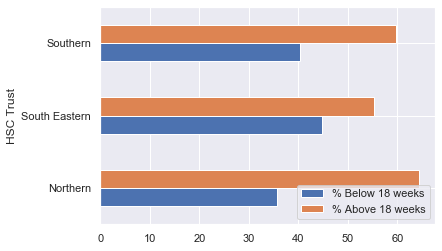

In [147]:
CentralCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-centralisation-q2-19-20.csv");CentralCOPWL=CentralCOPWL.drop([66,67,68,69,70,71]);CentralCOPWL=CentralCOPWL.dropna(axis='columns');OrigCCOPWL=CentralCOPWL;CentralCOPWL.replace("--", 0, inplace=True);CentralCOPWL["Total Waiting "] = CentralCOPWL["Total Waiting "].str.replace(",","").astype(float);CentralCOPWL['Below 18 weeks']= CentralCOPWL.iloc[:, 4:9].sum(axis=1);CentralCOPWL.drop(CentralCOPWL.columns[[4,5,6,7,8,9,10,11]], axis = 1, inplace = True);CentralCOPWL['Above 18 weeks'] = CentralCOPWL['Total Waiting '].sub(CentralCOPWL['Below 18 weeks'], axis = 0) 
CentralCOPWL['Quarter Ending']=pd.to_datetime(CentralCOPWL['Quarter Ending'])
CentralCOPWL['% Below 18 weeks'] = 100*CentralCOPWL['Below 18 weeks'].divide(CentralCOPWL["Total Waiting "], fill_value=1)
CentralCOPWL['% Above 18 weeks'] = 100*CentralCOPWL['Above 18 weeks'].divide(CentralCOPWL["Total Waiting "], fill_value=1)
#.info()

A=CentralCOPWL.groupby(['HSC Trust'])["% Below 18 weeks","% Above 18 weeks"].mean()
#
A.plot.barh()
A.info()
#CentralCOPWL.groupby['Quarter Ending'].mean()


In [148]:
FirstCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-q2-19-20.csv")
#Remove footer data
FirstCOPWL=FirstCOPWL.drop([6134,6135,6136,6137,6138])
FirstCOPWL.replace("--", 0, inplace=True)
#FirstCOPWL["Quarter Ending"]=pd.to_datetime(FirstCOPWL["Quarter Ending"])
FirstCOPWL["0 - 6 weeks"] = FirstCOPWL["0 - 6 weeks"].str.replace(",","").astype(int)
FirstCOPWL["> 6 - 9 weeks"] = FirstCOPWL["> 6 - 9 weeks"].str.replace(",","").astype(int)
FirstCOPWL["> 9 - 12 weeks"] = FirstCOPWL["> 9 - 12 weeks"].str.replace(",","").astype(float)
#FirstCOPWL["> 9 - 13 weeks"] = FirstCOPWL["> 9 - 13 weeks"].str.replace(",","").astype(float)
#FirstCOPWL["> 12-15 weeks"] = FirstCOPWL["> 12-15 weeks"].str.replace(",","").astype(float)
FirstCOPWL["> 13 - 26 weeks"] = FirstCOPWL["> 13 - 26 weeks"].str.replace(",","").astype(float)
FirstCOPWL["> 26 weeks"] = FirstCOPWL["> 26 weeks"].str.replace(",","").astype(float)


In [67]:
ICATSWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-icats-q2-19-20.csv")
ICATSWLA=ICATSWL.drop_duplicates();ICATSWL=ICATSWLA.drop([689,691,692,693,694]);ICATSWL=ICATSWL.dropna(axis='columns');ICATSWL=ICATSWL.fillna(0)
ICATSWL.replace("--", 0, inplace=True)
ICATSWL['Quarter Ending']=pd.to_datetime(ICATSWL['Quarter Ending'])
#Remove footer data

DayCaseIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-day-cases-q2-19-20.csv")
#Remove footer data
DayCaseIPWL=DayCaseIPWL.drop([4399,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412]);DayCaseIPWL.drop(DayCaseIPWL.columns[DayCaseIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DayCaseIPWL.replace("--", 0, inplace=True);DayCaseIPWL.fillna(0)
#TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#DayCaseIPWL['Quarter Ending']=pd.to_datetime(DayCaseIPWL['Quarter Ending'])

AdminIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-inpatients-q2-19-20.csv")
#Remove footer data
AdminIPWL=AdminIPWL.drop([2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005]);AdminIPWL=AdminIPWL.dropna(axis='columns');AdminIPWL=AdminIPWL.fillna(0);AdminIPWL.drop(AdminIPWL.columns[AdminIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#AdminIPWL['Quarter Ending']=pd.to_datetime(AdminIPWL['Quarter Ending'])
AdminIPWL["0 - 6 weeks"] = AdminIPWL["Total"].str.replace(",","").astype(int);AdminIPWL["> 6 - 13 weeks"] = AdminIPWL["> 6 - 13 weeks"].str.replace(",","").astype(int);AdminIPWL["> 13 - 21 weeks"] = AdminIPWL["> 13 - 21 weeks"].str.replace(",","").astype(int);AdminIPWL["> 21 - 26 weeks"] = AdminIPWL["> 21 - 26 weeks"].str.replace(",","").astype(int);AdminIPWL["Total"] = AdminIPWL["Total"].str.replace(",","").astype(int)

TotalIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-total-waiting-q2-19-20.csv");TotalIPWL=TotalIPWL.drop([4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561]);TotalIPWL=TotalIPWL.fillna(0);TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);TotalIPWL["Total"] = TotalIPWL["Total"].str.replace(",","").astype(int)
print("All In and Out Patient Data Imported")

All In and Out Patient Data Imported


In [69]:
#DayCaseIPWL['Quarter Ending']=pd.to_datetime(DayCaseIPWL['Quarter Ending'])
DayCaseIPWL.head()
#TotalIPWL['Quarter Ending']=pd.to_datetime(TotalIPWL['Quarter Ending'])
TotalIPWL.tail()

,Quarter Ending,HSCTrust,Specialty,Programme of Care,0 - 6 weeks,> 6 - 13 weeks,> 13 - 21 weeks,> 21 - 26 weeks,> 26 weeks,>26-52 weeks,>52 weeks,> 26-30 weeks,> 30 weeks,>30-36 weeks,> 26 - 36 weeks,> 36 weeks,Total
4545,30-Sep-2019,Western,Ophthalmology,Acute Services,418,392,438,246,1437,1225,212,0,0,0,0,0,2931
4546,30-Sep-2019,Western,Oral Surgery,Acute Services,125,68,69,21,208,72,136,0,0,0,0,0,491
4547,30-Sep-2019,Western,Pain Management,Acute Services,59,38,38,21,213,121,92,0,0,0,0,0,369
4548,30-Sep-2019,Western,T & O Surgery,Acute Services,327,248,296,207,3520,889,2631,0,0,0,0,0,4598
4549,30-Sep-2019,Western,Urology,Acute Services,349,155,126,84,710,421,289,0,0,0,0,0,1424


In [151]:
TotalIPWL.groupby("Specialty").means()

AttributeError: 'DataFrameGroupBy' object has no attribute 'means'

## Clean the Cancer Waiting Lists

In [31]:
HSCT31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-trust-q1-19-20.csv")
HSCT31DCWT=HSCT31DCWT.dropna(axis='columns')
new=HSCT31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
HSCT31DCWT["Treatment_Month"]= new[0] ;HSCT31DCWT["Treatment Year"]= '20' + new[1]
HSCT31DCWT.drop(columns =["Treatment Month"], inplace = True) 
HSCT31DCWT = HSCT31DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 31 days']]


HSCT62DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-62-day-wait-by-trust-q1-19-20.csv")
#remove NA columns
HSCT62DCWT=HSCT62DCWT.dropna(axis='columns')
new=HSCT62DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
HSCT62DCWT["Treatment_Month"]= new[0] 
HSCT62DCWT["Treatment Year"]= '20' + new[1]
HSCT62DCWT.drop(columns =["Treatment Month"], inplace = True) 
HSCT62DCWT = HSCT62DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 62 days']]


TS31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-tumour-q1-19-20.csv")  
TS31DCWT.drop(TS31DCWT.columns[TS31DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS31DCWT.replace("--", 
           0, 
           inplace=True)
TS31DCWT.replace("-", 
           0.0, 
           inplace=True)
#TS31DCWT=TS31DCWT.dropna(axis='columns')
new=TS31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS31DCWT["Treatment_Month"]= new[0] 
TS31DCWT["Treatment Year"]= '20' + new[1]
TS31DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS31DCWT= TS31DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 31 days']]

TS62DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-62-day-wait-by-tumour-q1-19-20.csv")
TS62DCWT.drop(TS62DCWT.columns[TS62DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS62DCWT.replace("--", 
           0, 
           inplace=True)
TS62DCWT.replace("-", 
           0, 
           inplace=True)
new=TS62DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS62DCWT["Treatment_Month"]= new[0] 
TS62DCWT["Treatment Year"]= '20' + new[1]
TS62DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS62DCWT= TS62DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 62 days']]
#TS62DCWT=TS62DCWT.dropna(axis='columns')


CWT14D=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-14-day-wait-q1-19-20.csv")
CWT14D=CWT14D.dropna(axis='columns')
new2=CWT14D["Month Seen"].str.split("-", n = 1, expand = True) 
CWT14D["Month_Seen"]= new[0] 
CWT14D["Year Seen"]= '20' + new[1]
CWT14D.drop(columns =["Month Seen"], inplace = True) 
CWT14D = CWT14D[['Month_Seen', 'Year Seen', 'HSC Trust', '% seen within 14 days']]


print("All Cancer Data Imported")

All Cancer Data Imported


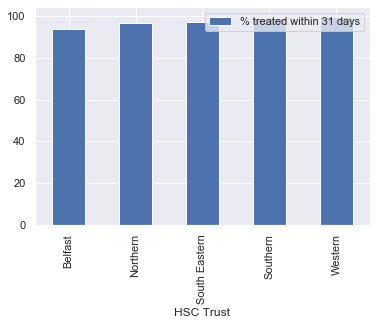

In [254]:
HSCT31DCWT.head()
test=HSCT31DCWT.groupby(["HSC Trust"]).mean()
test.plot.bar()


#TwentySixtoMax = DayCaseIPWL['> 26-30 weeks'] + DayCaseIPWL['>26-52 weeks'] + DayCaseIPWL['>30-36 weeks'] + DayCaseIPWL['> 26 - 36 weeks']
#Max=DayCaseIPWL['> 26 weeks'] + DayCaseIPWL['>52 weeks'] + DayCaseIPWL['> 36 weeks'] 


#DayCaseIPWL['Max'] = DayCaseIPWL.loc[:,'> 26 weeks'].add(DayCaseIPWL.loc[:,'> 36 weeks'])
#DayCaseIPWL['Max'] = DayCaseIPWL.loc[:,['> 26 weeks','> 36 weeks','>52 weeks']].sum(axis=1)
#DayCaseIPWL['Max']  = DayCaseIPWL.apply(lambda x: x['> 26 weeks'] +x['> 36 weeks'], axis=1)
#DayCaseIPWL.describe()
#df.loc[:,'> 26-30 weeks'] = df.loc[:,'> 26-30 weeks'] = df.loc[:,'budget'].add(df.loc[:,'actual'])
#DayCaseIPWL=DayCaseIPWL.dropna(axis='columns')
#DayCaseIPWL=DayCaseIPWL.dropna(axis='columns')
#new3=DayCaseIPWL["Quarter Ending"].str.split("-", n = 1, expand = True) 
#DayCaseIPWL["QE Day"]= new2[0] 
#DayCaseIPWL["QE Month"]= new2[1]
#DayCaseIPWL["QE Year"]= new2[2]
#DayCaseIPWL.drop(columns =["Quarter Ending"], inplace = True) 
#DayCaseIPWL = DayCaseIPWL[['QE Month','QE Year', 'HSC Trust','Specialty','Programme of Care','0 - 6 weeks','6 - 13 weeks','> 13 - 21 weeks','> 21 - 26 weeks','Total']]


In [33]:
new2=TS62DCWT[['Tumour Site', '% treated within 62 days']]
new2[pd.to_numeric(new2['% treated within 62 days'], errors='coerce').notnull()]
new2
C=new2.groupby(['Tumour Site'])



## Graphical Experiments

In [33]:
new2=TS62DCWT[['Tumour Site', '% treated within 62 days']]
new2[pd.to_numeric(new2['% treated within 62 days'], errors='coerce').notnull()]
new2
C=new2.groupby(['Tumour Site'])



In [288]:
TS31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-tumour-q1-19-20.csv")  
TS31DCWT.drop(TS31DCWT.columns[TS31DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS31DCWT.replace("--", 
           0, 
           inplace=True)
TS31DCWT.replace("-", 
           0.0, 
           inplace=True)
#TS31DCWT=TS31DCWT.dropna(axis='columns')
new=TS31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS31DCWT["Treatment_Month"]= new[0] 
TS31DCWT["Treatment Year"]= '20' + new[1]
TS31DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS31DCWT= TS31DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 31 days']]
#A=TS31DCWT.groupby(['% treated within 31 days'])
#A.describe()
A=TS31DCWT.groupby(['Tumour Site'])
A.head()


,Treatment_Month,Treatment Year,Tumour Site,% treated within 31 days
0,Dec,2008,Brain/Central Nervous System,100.0
1,Dec,2008,Breast Cancer,100.0
2,Dec,2008,Gynae Cancers,100.0
3,Dec,2008,Haematological Cancers,100.0
4,Dec,2008,Head/Neck Cancer,95.5
...,...,...,...,...
1164,Jan,2017,Brain Central Tumour,91.7
1176,Feb,2017,Brain Central Tumour,100.0
1188,Mar,2017,Brain Central Tumour,100.0
1200,Apr,2017,Brain Central Tumour,100.0


Graphs of the Cancer waiting times by Trust


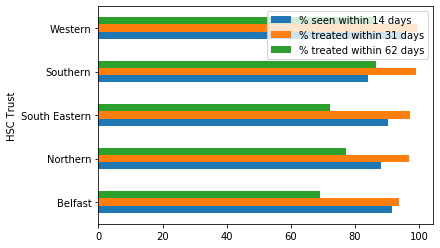

In [35]:
#CANCER WAITING TIMES
A=HSCT31DCWT.groupby(['HSC Trust']).mean()
B=HSCT62DCWT.groupby(['HSC Trust']).mean()
C=CWT14D.groupby(['HSC Trust']).mean()
#A.plot.bar()
#B.plot.bar()
join = pd.concat([C,A,B], axis=1, join='inner')
join.plot.barh()
print("Graphs of the Cancer waiting times by Trust")

Graphs of the Cancer waiting times by Treatment Time


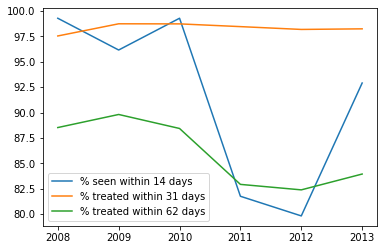

In [36]:
#CANCER WAITING TIMES
#df.month = pd.to_datetime(df.month, unit='s')
#['Treatment Month']
A=HSCT31DCWT.groupby(['Treatment Year']).mean()
B=HSCT62DCWT.groupby(['Treatment Year']).mean()
C=CWT14D.groupby(['Year Seen']).mean()
D = pd.concat([C,A,B], axis=1, join='inner')
D.plot.line()
print("Graphs of the Cancer waiting times by Treatment Time")



#plt.zlabel('14 days')

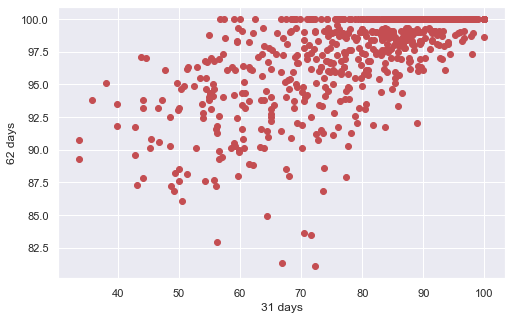

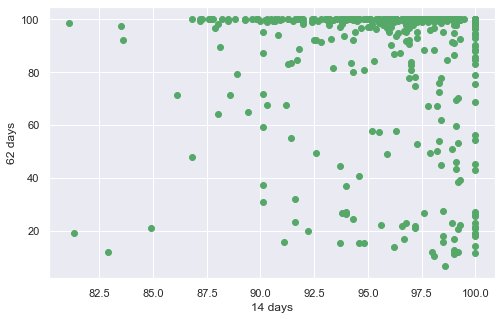

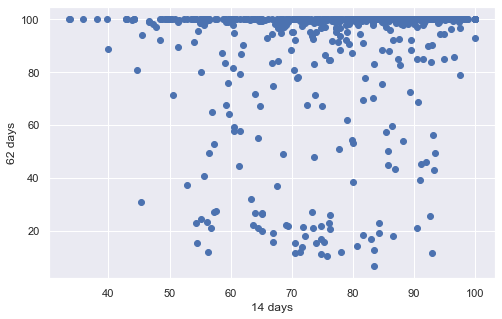

In [129]:

plt.figure(figsize=(8,5))
x_data, y_data = (HSCT62DCWT["% treated within 62 days"].values, HSCT31DCWT["% treated within 31 days"].values)
plt.plot(x_data, y_data,'ro')
plt.ylabel('62 days')
plt.xlabel('31 days')
plt.show()


plt.figure(figsize=(8,5))
x_data, y_data = (HSCT31DCWT["% treated within 31 days"].values, CWT14D['% seen within 14 days'].values)
plt.plot(x_data, y_data, 'go')
plt.ylabel('62 days')
plt.xlabel('14 days')
plt.show()


plt.figure(figsize=(8,5))
x_data, y_data = (HSCT62DCWT["% treated within 62 days"].values, CWT14D['% seen within 14 days'].values)
plt.plot(x_data, y_data, 'bo')
plt.ylabel('62 days')
plt.xlabel('14 days')
plt.show()

#sns.regplot(x='x_data', y='y_data', data=df)

In [299]:
HSCT31DCWT.info()
HSCT62DCWT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Treatment_Month           675 non-null    object 
 1   Treatment Year            675 non-null    object 
 2   HSC Trust                 675 non-null    object 
 3   % treated within 31 days  675 non-null    float64
dtypes: float64(1), object(3)
memory usage: 21.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Treatment_Month           675 non-null    object 
 1   Treatment Year            675 non-null    object 
 2   HSC Trust                 675 non-null    object 
 3   % treated within 62 days  675 non-null    float64
dtypes: float64(1), object(3)
memory usage: 21.2+ KB


[[99.1246875  89.9059375 ]
 [93.3        55.70074074]
 [96.76636364 75.26636364]]


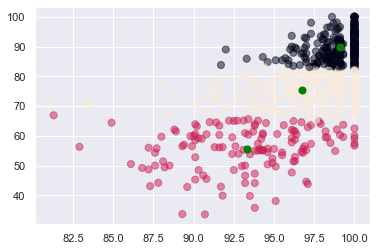

[[97.38486957 98.61547826]
 [96.27407407 21.31111111]
 [95.84565217 61.56086957]]


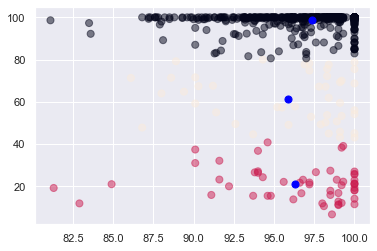

[[86.66952381 98.45809524]
 [73.06410256 30.67307692]
 [60.72259887 95.71525424]]


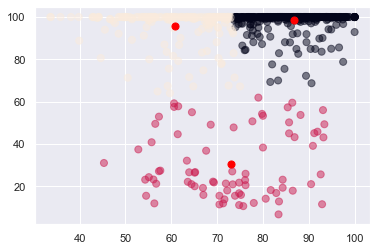

In [351]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_clusters=3
#Data =x_data, y_data = (HSCT31DCWT["% treated within 31 days"].values, CWT14D['% seen within 14 days'].values)
#x_data, y_data = (HSCT62DCWT["% treated within 62 days"].values, HSCT31DCWT["% treated within 31 days"].values)


Data = {'x': HSCT31DCWT["% treated within 31 days"].values,
        'y': HSCT62DCWT["% treated within 62 days"].values,
        'z': CWT14D['% seen within 14 days']
       }
  
df = DataFrame(Data,columns=['x','y'])

df1 = DataFrame(Data,columns=['x','z'])
df2 = DataFrame(Data,columns=['y','z'])
  
kmeans = KMeans(n_clusters).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50)
plt.show()

  
kmeans = KMeans(n_clusters).fit(df1)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df1['x'], df1['z'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50)
plt.show()

kmeans = KMeans(n_clusters).fit(df2)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df2['y'], df2['z'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


In [38]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#X=HSCT62DCWT["% treated within 62 days"]
#Y=CWT14D['% seen within 14 days"]
#lm.fit(X,Y)

SyntaxError: EOL while scanning string literal (<ipython-input-40-b0d1a9c89200>, line 2)

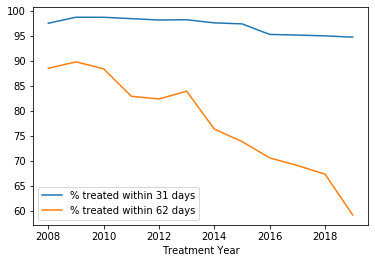

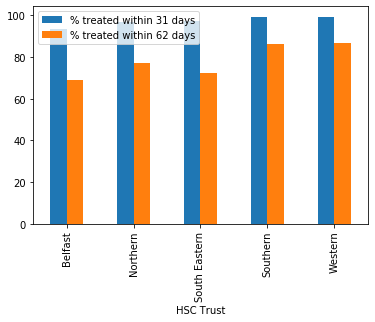

In [43]:
#HSCT31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-trust-q1-19-20.csv")
#HSCT31DCWT=HSCT31DCWT.dropna(axis='columns')
#new=HSCT31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
#HSCT31DCWT["Treatment_Month"]= new[0] 
#HSCT31DCWT["Treatment Year"]= '20' + new[1]
#HSCT31DCWT.drop(columns =["Treatment Month"], inplace = True) 
#HSCT31DCWT = HSCT31DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 31 days']]

E=HSCT31DCWT.groupby(['Treatment Year']).mean()
#E.plot.line()
F=HSCT31DCWT.groupby(['HSC Trust']).mean()
#F.plot.bar()
G=HSCT62DCWT.groupby(['Treatment Year']).mean()
#G.plot.line()
H=HSCT62DCWT.groupby(['HSC Trust']).mean()
#H.plot.bar()

J = pd.concat([E,G], axis=1, join='inner')
J.plot.line()

K = pd.concat([F,H], axis=1, join='inner')
K.plot.bar()



In [44]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


# now, read data using pandas dataframe:    
my_data = DiagnosticRTT
my_data[0:5]

# Remove the column containing the target name since it doesn't contain numeric values.
X = my_data[['% reported within 2 days','% reported within 2 weeks','% reported within 4 weeks','>28 days\t']].values
X[0:5]

# As you may figure out, some features in this dataset are categorical such as Sex or BP.
from sklearn import preprocessing
#le_Pri = preprocessing.LabelEncoder()
#le_Pri.fit(['ROUTINE','URGENT'])
#X[:,1] = le_Pri.transform(X[:,1]) 


#le_BP = preprocessing.LabelEncoder()
#le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
#X[:,2] = le_BP.transform(X[:,2])


#le_Chol = preprocessing.LabelEncoder()
#le_Chol.fit([ 'NORMAL', 'HIGH'])
#X[:,3] = le_Chol.transform(X[:,3]) 

#X[0:5]

# Now we can fill the target variable.
y = my_data["HSC Trust"]
y[0:5]

# Setting up the Decision Tree
# We will be using train/test split on our decision tree. 
# Let's import train_test_split from sklearn.cross_validation.

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Modeling
# We will first create an instance of the DecisionTreeClassifier called drugTree.
# Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

trustTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
trustTree # it shows the default parameters

# Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset
trustTree.fit(X_trainset,y_trainset)

# Prediction
# Let's make some predictions on the testing dataset and store it into a variable called predTree.

predTree = trustTree.predict(X_testset)

# You can print out predTree and y_testset if you want to visually compare the prediction to the actual values.

print (predTree [0:5])
print (y_testset [0:5])

# Evaluation
# Next, let's import metrics from sklearn and check the accuracy of our model.

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

['Southern' 'Belfast' 'Western' 'Southern' 'Southern']
3691         Southern
6578    South Eastern
6270          Belfast
6656         Northern
8448         Southern
Name: HSC Trust, dtype: object
DecisionTrees's Accuracy:  0.33668341708542715


In [ ]:
#import folium
#TrustMap = folium.Map(location=[54.6, -7.7], tiles = "Stamen Terrain", zoom_start=8.45)
#TrustMap

In [46]:
#import geopandas as gpd
#import matplotlib.pyplot as plt

## Calculate Percentages

In [48]:
import matplotlib.pyplot as plt
import pandas as pd



#CentralCOPWL
#OrigCCOPWL.head()
E=CentralCOPWL.groupby(['HSC Trust']).sum()

E.drop(E.columns[[0]], axis = 1, inplace = True)
#E.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
#plt.show()
#Slim_E= df2.iloc[:, -1:-2].subtract(axis=1)

#F=CentralCOPWL.groupby(['Specialty']).mean()
#F.head()
#plot = E.plot.pie(subplots=True, figsize=(6, 3))

#df2['Over 18 weeks']= df2.iloc[:, -1:-2].subtract(axis=1)
#CentralCOPWL.describe()
#FirstCOPWL


NameError: name 'CentralCOPWL' is not defined

In [49]:
AdminIPWL.head()
G=AdminIPWL.groupby(['Programme of Care']).mean()
G.plot.barh()

NameError: name 'AdminIPWL' is not defined

In [50]:
TotalIPWL.head()

NameError: name 'TotalIPWL' is not defined

In [51]:
TotalIPWL.tail()
#F=TotalIPWL.groupby(['HSCTrust']).mean()
#F.plot.barh()
F=TotalIPWL.groupby(['Programme of Care']).mean()
F.plot.barh()

NameError: name 'TotalIPWL' is not defined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   New_Hospital      2365 non-null   object 
 1   FourAndUnder_sum  2365 non-null   float64
 2   FiveToTwelve_sum  2365 non-null   float64
 3   OverTwelve_sum    2365 non-null   int64  
 4   Total_sum         2365 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 92.5+ KB


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

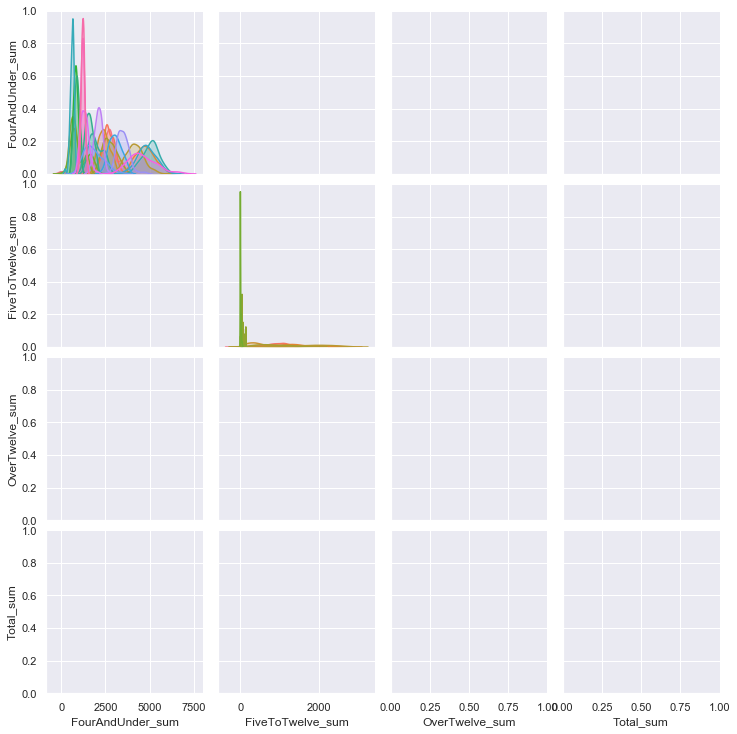

In [52]:
#([6134,6135,6136,6137,6138])
#


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
EmergWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-ecwt-tables-q1-18-19.csv");EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)","The Royal", inplace=False);EmergWL=EmergWL.fillna(0);EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(" ","");EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(",","").astype(float);EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(" ","");EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(",","").astype(float);EmergWL["FiveToTwelve_sum"] = EmergWL["FiveToTwelve_sum"].str.replace(",","").astype(float) 
EmergWL.info
df=EmergWL.drop(columns =['MthAndYrCode','Trust','Year','Type'], inplace = False) 
df.info()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
sns.pairplot(df, hue='New_Hospital')
#DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float)

#DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);

#DiagnosticWT=DiagnosticWT.fillna(0);
#sns.set()
#%matplotlib inline
#DiagnosticWT.head()
#df=DiagnosticWT.apply (pd.to_numeric, errors='coerce')
#DWT=df.dropna()
#DiagnosticWT.describe()

#DWTbyRWT=DiagnosticWT.groupby("Recommended Waiting Time")
#DWTbyRWT.describe()


